In [1]:
# First load the modules we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pandas Data Structures
1. Series
2. DataFrame



# Step 1: Get the Data

In [2]:
# we load the file 
flights = pd.read_csv("Data/flights.csv")

# Step 2: Examine the Data - Looking for issues that require fixing

In [3]:
# get number of row, columns with Shape
flights.shape

(58492, 14)

In [4]:
# Let's check out first 5 row and last 5 rows
# top 5 with head
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [5]:
# bottom 5 with head
flights.tail()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
58487,12,31,4,AA,SFO,DFW,515,5.0,166.0,1464,1045,-19.0,0,0
58488,12,31,4,F9,LAS,SFO,1910,13.0,71.0,414,2050,4.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0
58490,12,31,4,WN,MSP,ATL,525,39.0,124.0,907,855,34.0,0,0
58491,12,31,4,OO,SFO,BOI,859,5.0,73.0,522,1146,-1.0,0,0


In [6]:
# list column names
flights.columns

Index(['MONTH', 'DAY', 'WEEKDAY', 'AIRLINE', 'ORG_AIR', 'DEST_AIR',
       'SCHED_DEP', 'DEP_DELAY', 'AIR_TIME', 'DIST', 'SCHED_ARR', 'ARR_DELAY',
       'DIVERTED', 'CANCELLED'],
      dtype='object')

In [7]:
# inspect data types for each column to make sure they are correct
flights.dtypes

MONTH          int64
DAY            int64
WEEKDAY        int64
AIRLINE       object
ORG_AIR       object
DEST_AIR      object
SCHED_DEP      int64
DEP_DELAY    float64
AIR_TIME     float64
DIST           int64
SCHED_ARR      int64
ARR_DELAY    float64
DIVERTED       int64
CANCELLED      int64
dtype: object

In [8]:
# using info() we can soo how many non-null entries for each column exist
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
MONTH        58492 non-null int64
DAY          58492 non-null int64
WEEKDAY      58492 non-null int64
AIRLINE      58492 non-null object
ORG_AIR      58492 non-null object
DEST_AIR     58492 non-null object
SCHED_DEP    58492 non-null int64
DEP_DELAY    57659 non-null float64
AIR_TIME     57474 non-null float64
DIST         58492 non-null int64
SCHED_ARR    58492 non-null int64
ARR_DELAY    57474 non-null float64
DIVERTED     58492 non-null int64
CANCELLED    58492 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


In [9]:
# Check if we have any duplicate records we use duplicated() function
flights.duplicated().sum()

0

**Count number of NaN values: either `isna()` or `isnull()`**

In [10]:
# counting the number of NaN values. Since isna() and isnull() return bools True (1) or False (0) 
flights.isna().sum()

MONTH           0
DAY             0
WEEKDAY         0
AIRLINE         0
ORG_AIR         0
DEST_AIR        0
SCHED_DEP       0
DEP_DELAY     833
AIR_TIME     1018
DIST            0
SCHED_ARR       0
ARR_DELAY    1018
DIVERTED        0
CANCELLED       0
dtype: int64

In [11]:
# isnull and isna in Pandas are the same
flights.isnull().sum()

MONTH           0
DAY             0
WEEKDAY         0
AIRLINE         0
ORG_AIR         0
DEST_AIR        0
SCHED_DEP       0
DEP_DELAY     833
AIR_TIME     1018
DIST            0
SCHED_ARR       0
ARR_DELAY    1018
DIVERTED        0
CANCELLED       0
dtype: int64

In [12]:
# Let us examine one column that we think is important to our analysis to examin the NaN rows
flights.loc[flights["AIR_TIME"].isnull()].head(10)                                              

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
24,1,1,4,MQ,DFW,BTR,730,NaN,NaN,383,853,NaN,0,1
51,1,1,4,OO,PHX,SLC,950,NaN,NaN,507,1138,NaN,0,1
73,1,1,4,AA,DFW,ICT,1000,NaN,NaN,328,1115,NaN,0,1
78,1,1,4,MQ,DFW,SJT,2155,NaN,NaN,229,2253,NaN,0,1
106,1,1,4,EV,DFW,LAW,1130,NaN,NaN,140,1215,NaN,0,1
115,1,1,4,MQ,DFW,LRD,1255,NaN,NaN,396,1418,NaN,0,1
125,1,1,4,MQ,DFW,PNS,1035,NaN,NaN,604,1213,NaN,0,1
228,1,2,5,MQ,DFW,TUL,740,NaN,NaN,237,843,NaN,0,1
268,1,2,5,EV,IAH,HOB,1800,NaN,NaN,501,1840,NaN,0,1
357,1,3,6,MQ,DFW,AMA,1250,NaN,NaN,312,1358,NaN,0,1


In [13]:
# describe gives us general statistics for numeric columns
flights.describe()

,MONTH,DAY,WEEKDAY,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
count,58492.000000,58492.000000,58492.000000,58492.000000,57659.000000,57474.000000,58492.000000,58492.000000,57474.000000,58492.000000,58492.000000
mean,6.220646,15.702096,3.926862,1387.984836,10.921192,115.928576,872.900072,1549.399832,5.812315,0.002342,0.015062
std,3.358484,8.760846,1.995777,482.810792,36.146210,71.679591,624.996805,518.599952,38.411948,0.048340,0.121800
min,1.000000,1.000000,1.000000,5.000000,-24.000000,8.000000,67.000000,1.000000,-60.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,1000.000000,-4.000000,61.000000,391.000000,1159.000000,-12.000000,0.000000,0.000000
50%,6.000000,16.000000,4.000000,1353.000000,-1.000000,97.000000,690.000000,1603.000000,-4.000000,0.000000,0.000000
75%,9.000000,23.000000,6.000000,1805.000000,10.000000,152.000000,1199.000000,1959.000000,9.000000,0.000000,0.000000
max,12.000000,31.000000,7.000000,2359.000000,1194.000000,577.000000,4502.000000,2359.000000,1185.000000,1.000000,1.000000


In [14]:
# we can also use describe for categorical data 
flights.describe(include='object')

,AIRLINE,ORG_AIR,DEST_AIR
count,58492,58492,58492
unique,14,10,271
top,DL,ATL,LAX
freq,10601,10413,1991


In [15]:
flights["AIRLINE"].value_counts(normalize=True)

DL    0.181238
AA    0.152158
WN    0.143917
UA    0.133215
OO    0.112631
EV    0.100150
MQ    0.059341
US    0.027611
NK    0.025918
F9    0.022516
VX    0.016977
AS    0.013130
B6    0.009283
HA    0.001915
Name: AIRLINE, dtype: float64

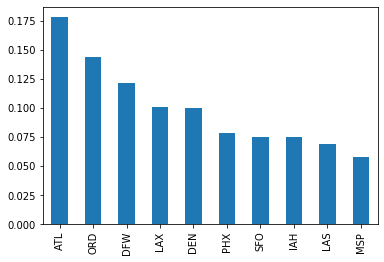

In [16]:
flights["ORG_AIR"].value_counts(normalize=True).plot(kind='bar')

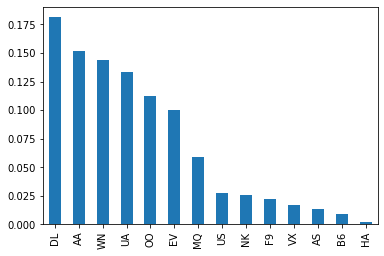

In [17]:
flights["AIRLINE"].value_counts(normalize=True).plot(kind='bar')

In [18]:
flights["CANCELLED"].value_counts(normalize=True)

0    0.984938
1    0.015062
Name: CANCELLED, dtype: float64

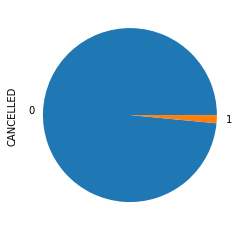

In [19]:
flights["CANCELLED"].value_counts(normalize=True).plot(kind='pie')

In [20]:
flights["DIVERTED"].value_counts(normalize=True)

0    0.997658
1    0.002342
Name: DIVERTED, dtype: float64

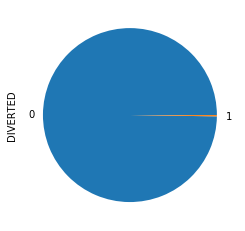

In [21]:
flights["DIVERTED"].value_counts(normalize=True).plot(kind='pie')

# Step 3: Data Wrangling and Preparation

In [22]:
flights_dropped = flights.dropna()
flights_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57474 entries, 0 to 58491
Data columns (total 14 columns):
MONTH        57474 non-null int64
DAY          57474 non-null int64
WEEKDAY      57474 non-null int64
AIRLINE      57474 non-null object
ORG_AIR      57474 non-null object
DEST_AIR     57474 non-null object
SCHED_DEP    57474 non-null int64
DEP_DELAY    57474 non-null float64
AIR_TIME     57474 non-null float64
DIST         57474 non-null int64
SCHED_ARR    57474 non-null int64
ARR_DELAY    57474 non-null float64
DIVERTED     57474 non-null int64
CANCELLED    57474 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 6.6+ MB


### Using `fillna()`

In [23]:
flights[flights["AIR_TIME"].isna()].head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
24,1,1,4,MQ,DFW,BTR,730,NaN,NaN,383,853,NaN,0,1
51,1,1,4,OO,PHX,SLC,950,NaN,NaN,507,1138,NaN,0,1
73,1,1,4,AA,DFW,ICT,1000,NaN,NaN,328,1115,NaN,0,1
78,1,1,4,MQ,DFW,SJT,2155,NaN,NaN,229,2253,NaN,0,1
106,1,1,4,EV,DFW,LAW,1130,NaN,NaN,140,1215,NaN,0,1


In [24]:
flights_fill = flights.fillna(method='backfill')

In [25]:
flights_fill.iloc[[24,25,51,52,73,74],:]

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
24,1,1,4,MQ,DFW,BTR,730,-4.0,31.0,383,853,5.0,0,1
25,1,1,4,OO,ORD,SPI,2110,-4.0,31.0,174,2205,5.0,0,0
51,1,1,4,OO,PHX,SLC,950,127.0,74.0,507,1138,165.0,0,1
52,1,1,4,OO,DEN,FSD,1950,127.0,74.0,483,2218,165.0,0,0
73,1,1,4,AA,DFW,ICT,1000,-1.0,103.0,328,1115,1.0,0,1
74,1,1,4,NK,PHX,DFW,159,-1.0,103.0,868,502,1.0,0,0


In [26]:
flights_fill2 = flights.fillna(method='pad')
flights_fill2.iloc[[23,24,25,50,51,52,72,73,74],:]

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
23,1,1,4,WN,ATL,HOU,1555,30.0,113.0,696,1720,18.0,0,0
24,1,1,4,MQ,DFW,BTR,730,30.0,113.0,383,853,18.0,0,1
25,1,1,4,OO,ORD,SPI,2110,-4.0,31.0,174,2205,5.0,0,0
50,1,1,4,MQ,ORD,CID,1135,-7.0,37.0,196,1238,-15.0,0,0
51,1,1,4,OO,PHX,SLC,950,-7.0,37.0,507,1138,-15.0,0,1
52,1,1,4,OO,DEN,FSD,1950,127.0,74.0,483,2218,165.0,0,0
72,1,1,4,UA,DEN,FLL,957,8.0,201.0,1703,1544,11.0,0,0
73,1,1,4,AA,DFW,ICT,1000,8.0,201.0,328,1115,11.0,0,1
74,1,1,4,NK,PHX,DFW,159,-1.0,103.0,868,502,1.0,0,0


In [27]:
flights.AIR_TIME.mean()

115.92857639976337

In [28]:
air_time_avg = flights.AIR_TIME.mean()
air_time = flights["AIR_TIME"].fillna(air_time_avg)
air_time[[23,24,25,50,51,52,72,73,74]]

23    113.000000
24    115.928576
25     31.000000
50     37.000000
51    115.928576
52     74.000000
72    201.000000
73    115.928576
74    103.000000
Name: AIR_TIME, dtype: float64

In [29]:
# lets examin a specific airline, org_air and dest_air 
flights[(flights["AIRLINE"] == "MQ") & (flights["ORG_AIR"] == "DFW") & (flights["DEST_AIR"] == "BTR")]

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
24,1,1,4,MQ,DFW,BTR,730,NaN,NaN,383,853,NaN,0,1
4374,1,27,2,MQ,DFW,BTR,745,-7.0,56.0,383,904,-14.0,0,0
4999,1,31,6,MQ,DFW,BTR,1245,32.0,56.0,383,1403,25.0,0,0
5652,2,5,4,MQ,DFW,BTR,700,-3.0,57.0,383,820,26.0,0,0
5668,2,5,4,MQ,DFW,BTR,745,-11.0,58.0,383,904,64.0,0,0
6463,2,10,2,MQ,DFW,BTR,1245,-3.0,55.0,383,1403,-11.0,0,0
6478,2,10,2,MQ,DFW,BTR,1345,-5.0,54.0,383,1504,-16.0,0,0
6770,2,12,4,MQ,DFW,BTR,650,-2.0,52.0,383,810,-11.0,0,0
7919,2,18,3,MQ,DFW,BTR,1245,-8.0,53.0,383,1403,-11.0,0,0
8039,2,19,4,MQ,DFW,BTR,745,-1.0,55.0,383,904,-8.0,0,0


In [30]:
# using group by to get a better avg for this particular route by airline and org and des airports
at_avg = flights["AIR_TIME"].fillna(flights.groupby(["ORG_AIR","DEST_AIR"])["AIR_TIME"].transform("mean"))
at_avg[[24,51,73,78]]

24    56.532468
51    72.225806
73    53.150000
78    40.795918
Name: AIR_TIME, dtype: float64

In [31]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
MONTH        58492 non-null int64
DAY          58492 non-null int64
WEEKDAY      58492 non-null int64
AIRLINE      58492 non-null object
ORG_AIR      58492 non-null object
DEST_AIR     58492 non-null object
SCHED_DEP    58492 non-null int64
DEP_DELAY    57659 non-null float64
AIR_TIME     57474 non-null float64
DIST         58492 non-null int64
SCHED_ARR    58492 non-null int64
ARR_DELAY    57474 non-null float64
DIVERTED     58492 non-null int64
CANCELLED    58492 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


In [32]:
flights["AIR_TIME"].fillna(flights.groupby(["ORG_AIR","DEST_AIR"])["AIR_TIME"].transform("mean"), inplace=True)

In [34]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
MONTH        58492 non-null int64
DAY          58492 non-null int64
WEEKDAY      58492 non-null int64
AIRLINE      58492 non-null object
ORG_AIR      58492 non-null object
DEST_AIR     58492 non-null object
SCHED_DEP    58492 non-null int64
DEP_DELAY    57659 non-null float64
AIR_TIME     58492 non-null float64
DIST         58492 non-null int64
SCHED_ARR    58492 non-null int64
ARR_DELAY    57474 non-null float64
DIVERTED     58492 non-null int64
CANCELLED    58492 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB


# Step 4: Conduct Formal Data Analysis:  What are the Questions we want to Answer

In [35]:
flights.groupby(["AIRLINE","ORG_AIR"])["DEP_DELAY", "ARR_DELAY", "CANCELLED", "AIR_TIME"].mean()

DEP_DELAY  ARR_DELAY  CANCELLED    AIR_TIME
AIRLINE ORG_AIR                                             
AA      ATL       7.995652   4.292576   0.012876  118.037819
        DEN      10.367442   9.485981   0.018265  115.750126
        DFW      11.408569   5.305215   0.021468  127.737607
        IAH      13.046632  10.813472   0.015306   96.768651
        LAS      10.347709   7.907609   0.008021  149.491649
...                    ...        ...        ...         ...
WN      LAS      12.363636   6.851760   0.003447  107.341282
        LAX      15.697464  11.192552   0.028194  103.842533
        MSP       8.444915  -0.271186   0.004219   89.442913
        PHX      12.444121   6.165015   0.003480  105.932650
        SFO      11.185714   4.473810   0.056180   91.875381

[114 rows x 4 columns]

In [36]:
flights_by_airline = flights.groupby(["AIRLINE","ORG_AIR"])["DEP_DELAY", "ARR_DELAY", "CANCELLED", "AIR_TIME"].mean()
flights_by_airline.head()

DEP_DELAY  ARR_DELAY  CANCELLED    AIR_TIME
AIRLINE ORG_AIR                                             
AA      ATL       7.995652   4.292576   0.012876  118.037819
        DEN      10.367442   9.485981   0.018265  115.750126
        DFW      11.408569   5.305215   0.021468  127.737607
        IAH      13.046632  10.813472   0.015306   96.768651
        LAS      10.347709   7.907609   0.008021  149.491649

In [37]:
flights_by_airline.index

MultiIndex([('AA', 'ATL'),
            ('AA', 'DEN'),
            ('AA', 'DFW'),
            ('AA', 'IAH'),
            ('AA', 'LAS'),
            ('AA', 'LAX'),
            ('AA', 'MSP'),
            ('AA', 'ORD'),
            ('AA', 'PHX'),
            ('AA', 'SFO'),
            ...
            ('VX', 'LAX'),
            ('VX', 'ORD'),
            ('VX', 'SFO'),
            ('WN', 'ATL'),
            ('WN', 'DEN'),
            ('WN', 'LAS'),
            ('WN', 'LAX'),
            ('WN', 'MSP'),
            ('WN', 'PHX'),
            ('WN', 'SFO')],
           names=['AIRLINE', 'ORG_AIR'], length=114)

In [38]:
flights_by_airline.columns

Index(['DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'AIR_TIME'], dtype='object')

In [39]:
flights_by_airline.groupby(level=1).mean()

,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME
ORG_AIR,,,,
ATL,13.930700,9.442258,0.016048,118.023732
DEN,9.064534,6.000827,0.009480,124.652256
DFW,12.934101,9.560794,0.017467,125.696171
IAH,10.107664,7.222445,0.009904,124.683821
LAS,7.568187,5.085750,0.003911,155.152884
LAX,11.259545,7.680559,0.007941,180.359418
MSP,15.160469,13.396452,0.011943,111.501477
ORD,15.688300,11.910348,0.023627,133.416273
PHX,7.349817,2.645944,0.008788,160.425939


In [40]:
flights_by_airline.groupby(level=0).mean()

,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME
AIRLINE,,,,
AA,10.063842,5.704180,0.014094,142.777223
AS,2.654506,0.108824,0.000000,189.067414
B6,16.171364,10.813873,0.000922,204.156483
DL,7.635934,1.367385,0.002715,138.904216
EV,10.313446,5.654659,0.024913,82.282755
F9,17.008531,16.252709,0.011197,129.546330
HA,1.637015,6.028773,0.000000,343.340790
MQ,21.358333,23.525278,0.029191,72.334623
NK,18.980655,17.867635,0.018519,130.775054


In [ ]:
flights_by_airline.groupby(level=2).mean()